# Theory ML  - Tree Methods Focus 

### Publishing : 2024-03-11
### Due date :  2024-03-23 kl 23:59
### 4 points per task ( 4-3 ,4-4,4-5) as 8 Tasks
### to G we need 85 points 
### 95+ is VG 

----

**Use this notebook as a general guide, completing the tasks in bold shown below.**
   

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [1]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**TASK 1-1: using the right command , what we have for datatypes? and any non-null values in your dataframe?.**

In [4]:
# CODE HERE
df.info()
# Just 4 continunous columns, everything else is categorical.
# No null rows 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK 1-2: Get a quick statistical summary of the numeric columns with .describe() , Which columns are categorical?, what will eventually need to do with them?.**

In [5]:
# CODE HERE
df.describe()
# They will need to be scaled eventually to bring everything closer together

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK 2-1 : Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [7]:
# CODE HERE
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK 2-1 :Display the balance of the class labels (Churn) with a Count Plot.**

<Axes: xlabel='Churn', ylabel='count'>

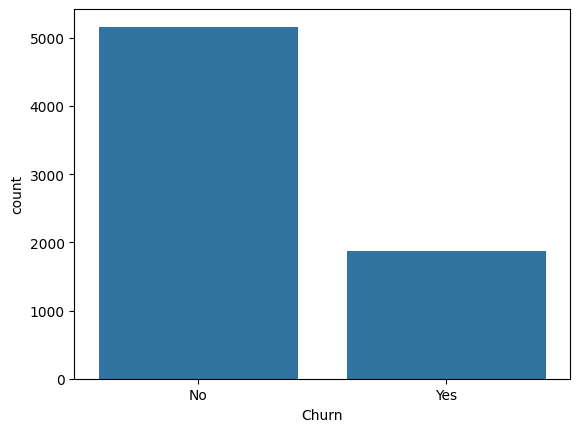

In [12]:
# CODE HERE
sns.countplot(df, x='Churn')

<img src='fig1.png' >

**TASK 2-3 : Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

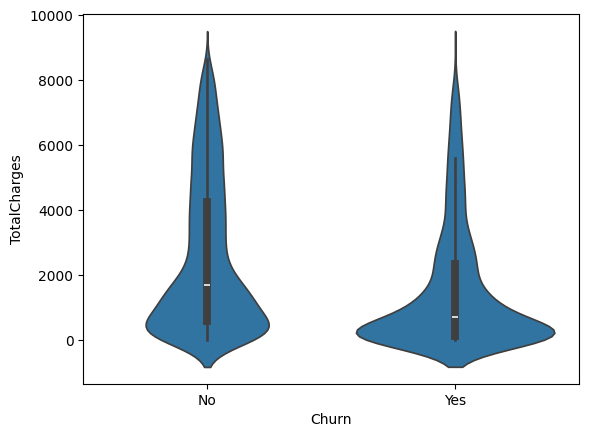

In [16]:
# CODE HERE
sns.violinplot(df, x='Churn', y='TotalCharges')

<img src='fig2.png' >

**TASK 2-4 : Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

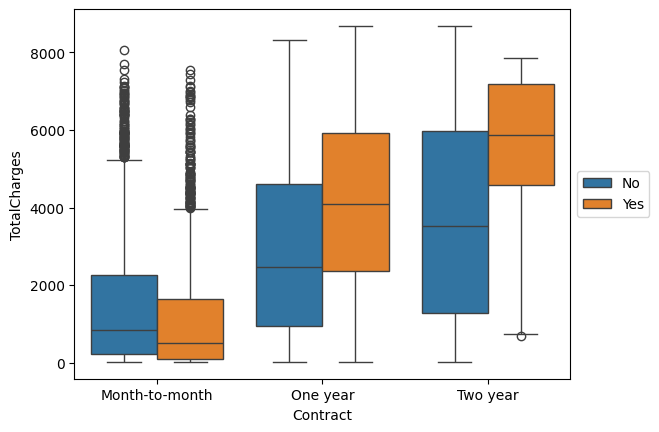

In [21]:
sns.boxplot(df, x='Contract', y='TotalCharges', hue='Churn')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<img src='fig3.png' >

**TASK 2-5: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [13]:
correlations = pd.get_dummies(df.drop('customerID',axis=1), columns=['gender', 'SeniorCitizen', 'Partner', 
                                                'Dependents','PhoneService', 'MultipleLines','OnlineSecurity',
                                                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                                'InternetService', 'StreamingTV', 'StreamingMovies',
                                                'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
                            drop_first=True, dtype='int').corr().tail(1).T.iloc[:-1]['Churn_Yes'].sort_values()

correlations

tenure                                  -0.354049
Contract_Two year                       -0.301552
StreamingMovies_No internet service     -0.227578
StreamingTV_No internet service         -0.227578
InternetService_No                      -0.227578
TechSupport_No internet service         -0.227578
OnlineBackup_No internet service        -0.227578
OnlineSecurity_No internet service      -0.227578
DeviceProtection_No internet service    -0.227578
TotalCharges                            -0.199484
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
Partner_Yes                             -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
MultipleLines_No phone service          -0.011691


Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

Text(0.5, 1.0, 'Correlation of Features with Churn_Yes')

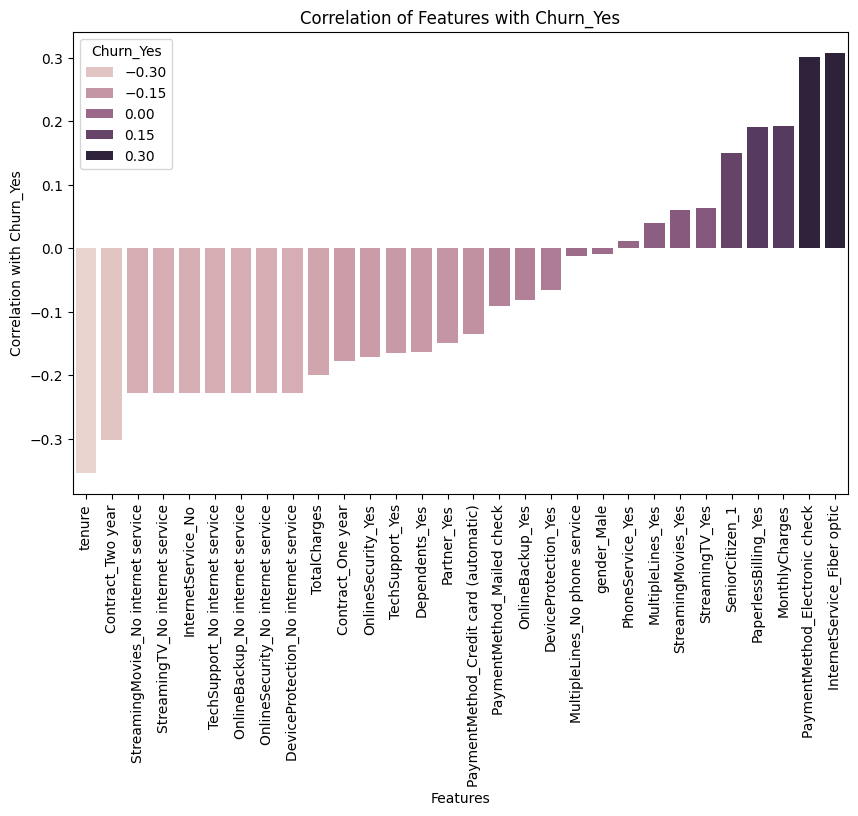

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, hue=correlations)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with Churn_Yes')
plt.title('Correlation of Features with Churn_Yes')

In [ ]:
sns.displot

<img src='figbar.png'>


# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK 3-1 : What are the 3 contract types available?**

In [32]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK 3 -2 : Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

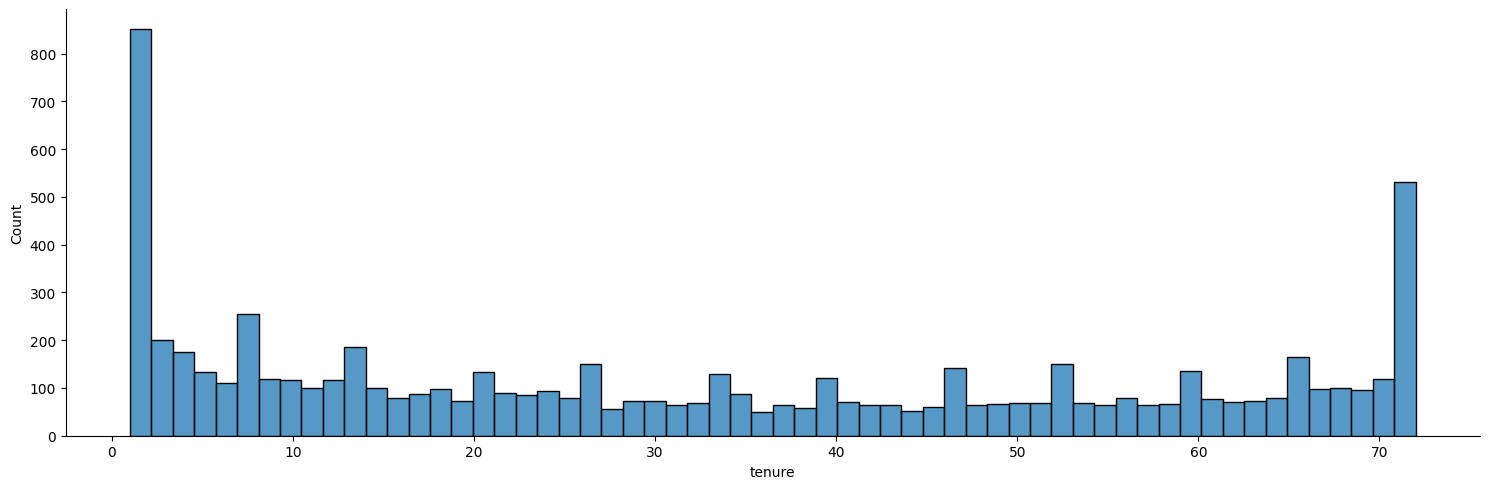

In [62]:
sns.displot(df, x='tenure', aspect=3, bins=60)

<img src="fig5.png">

**TASK 3 - 3 : Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

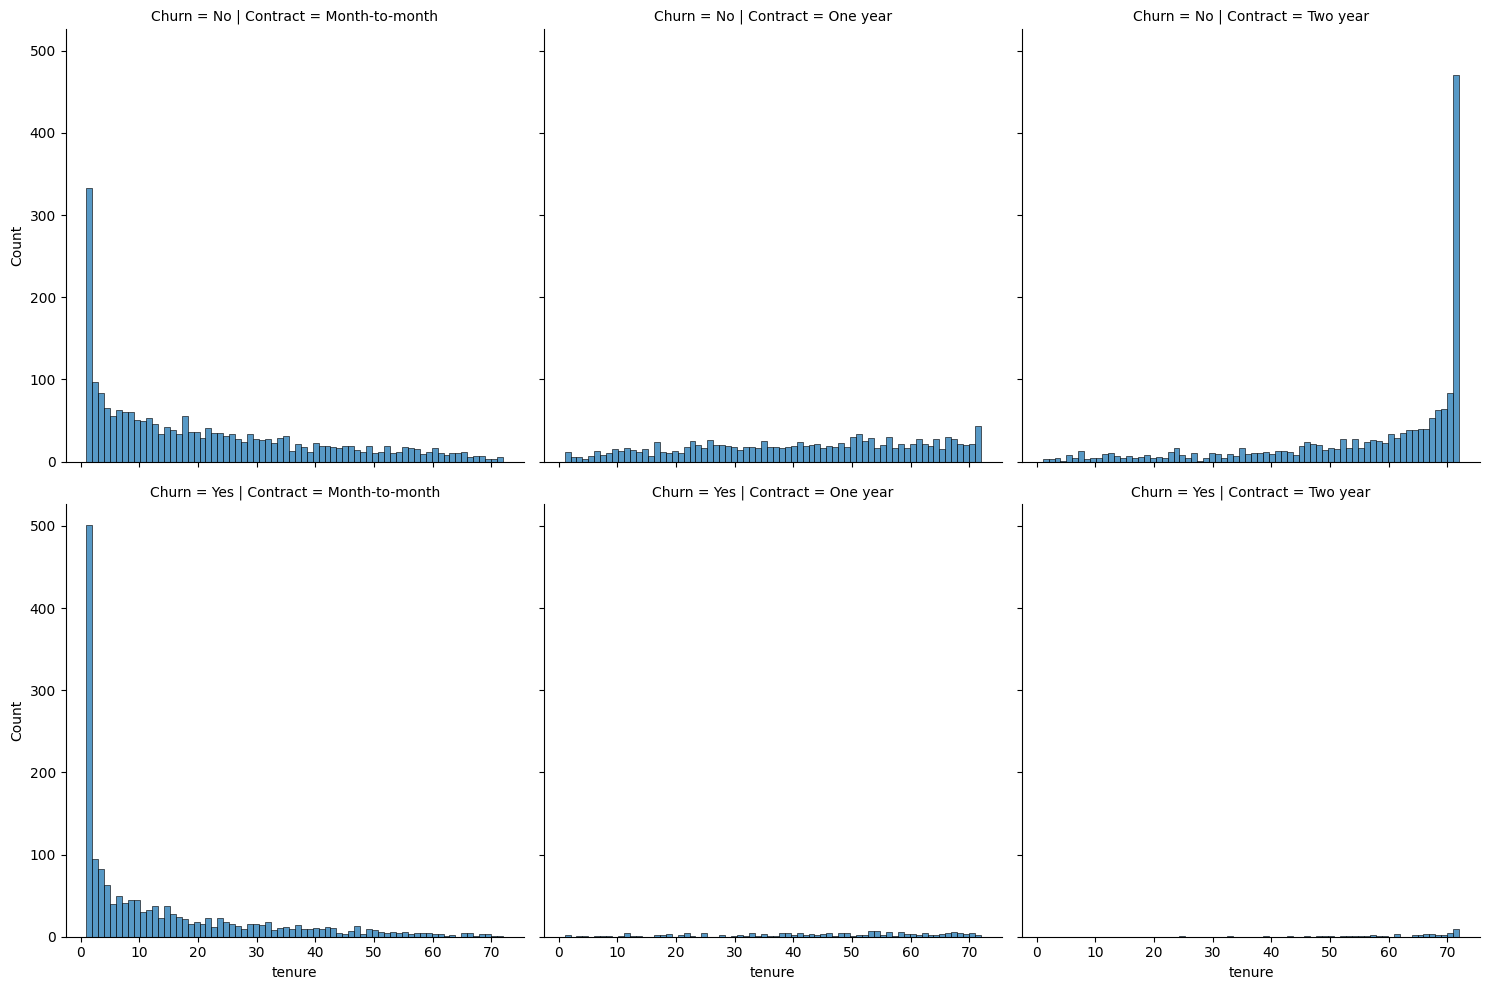

In [63]:
sns.displot(df, x='tenure',
            col='Contract',
            row='Churn',
            bins=70)

<img src="fig6.png">

**TASK 3 - 4: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

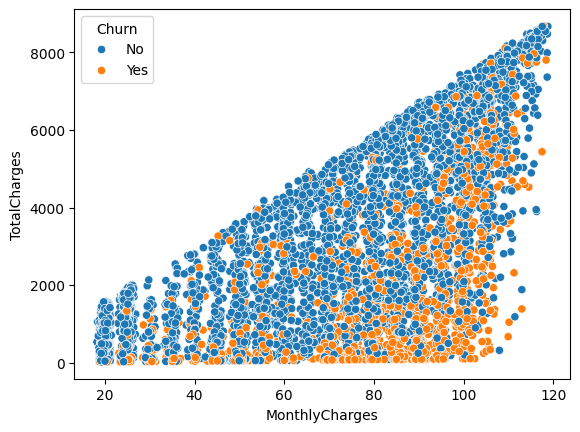

In [66]:
sns.scatterplot(df, x='MonthlyCharges',
                y='TotalCharges',
                hue='Churn')

<img src='fig7.png'>

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK 3 -5 : Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [40]:
df.groupby('tenure')['Churn'].apply(lambda x: (x == 'Yes').mean()*100)

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: Churn, Length: 72, dtype: float64

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**TASK 3 -6: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

<Axes: xlabel='tenure', ylabel='Churn'>

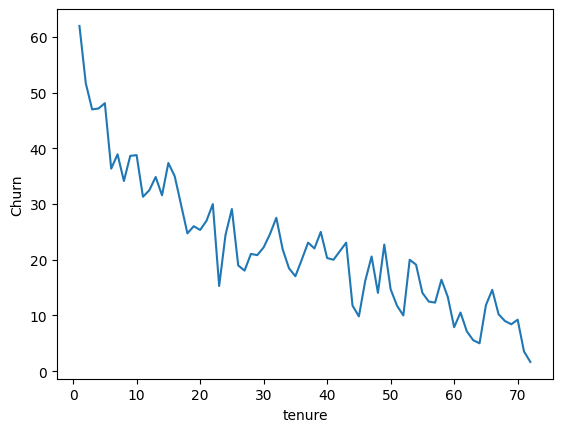

In [44]:
churn_rate_by_tenure = df.groupby('tenure')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()

sns.lineplot(data=churn_rate_by_tenure, x='tenure', y='Churn')

<img src='fig9.png'>

### Broader Cohort Groups
**TASK 3-7 : Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [71]:
df['Tenure Cohort'] = df['tenure'].apply(lambda x:'0-12 months' if 0 < x <= 12 else 
                                             '12-24 months' if 12 < x <= 24 else 
                                             '24-48 months' if 24 < x <= 48 else 
                                             'Over 48 months')

df[['tenure','Tenure Cohort']].head(10)

,tenure,Tenure Cohort
0,1,0-12 months
1,34,24-48 months
2,2,0-12 months
3,45,24-48 months
4,2,0-12 months
5,8,0-12 months
6,22,12-24 months
7,10,0-12 months
8,28,24-48 months
9,62,Over 48 months


,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**TASK 3-8: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

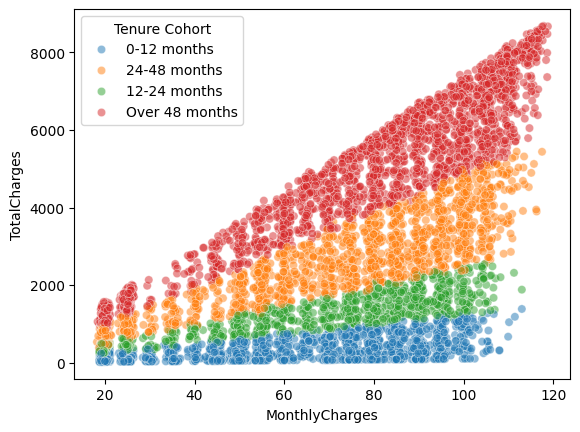

In [74]:
sns.scatterplot(df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', alpha=0.5)

<img src='fig10.png'>

**TASK 3-9 : Create a count plot showing the churn count per cohort.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

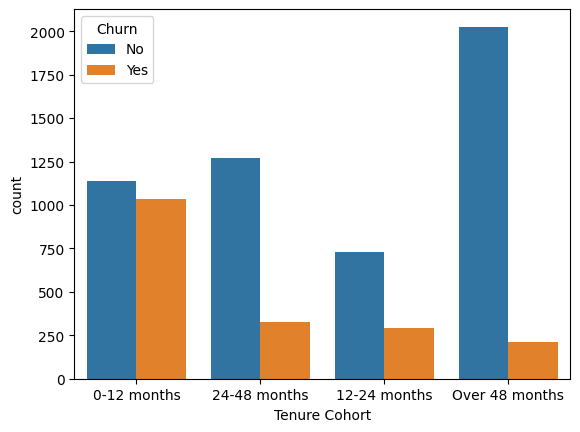

In [77]:
sns.countplot(df, x='Tenure Cohort', hue='Churn')

<img src='cplot.png'>

**TASK 3-10: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

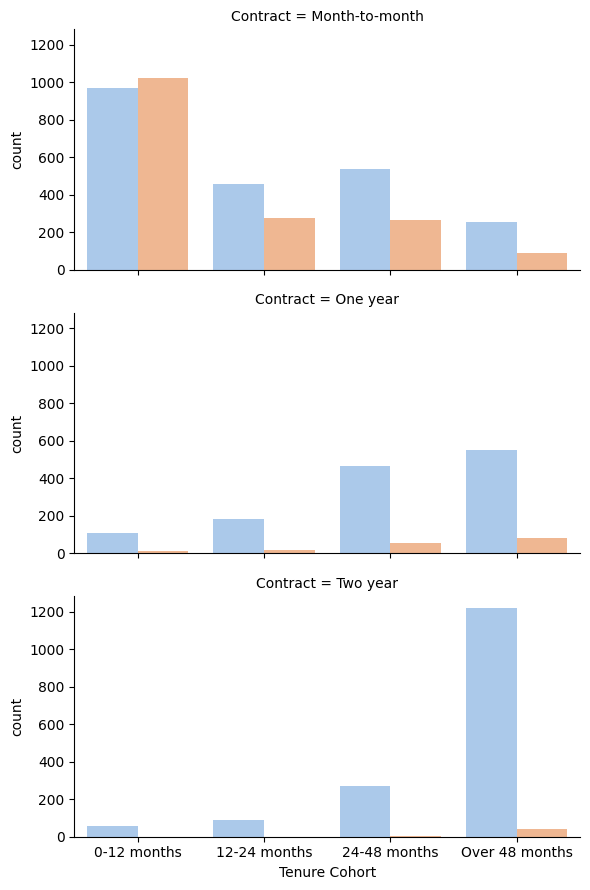

In [91]:
g = sns.FacetGrid(df, row='Contract', aspect=2)
g.map_dataframe(sns.countplot, x='Tenure Cohort', hue='Churn', palette='pastel')

<img src='fig11.png'>

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.**


## Single Decision Tree

**TASK 4 -1 : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [3]:
df.drop('customerID', axis=1, inplace=True)
X = df.drop('Churn', axis=1)
X = pd.get_dummies(X, drop_first=True, dtype='int')
y = df['Churn']

**TASK 4-2 : Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions.**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK 4-3 : Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

grid_param_tree = {'criterion': ['gini', 'entropy'],
                   'random_state': [101],
                   'min_impurity_decrease': np.linspace(0.0005,0.01,10),
                   'max_leaf_nodes': np.arange(2,15),
                   'max_features': [None, 'sqrt', 'log2'],
                   'max_depth': [None, 5, 10, 15, 20]}

model_tree = DecisionTreeClassifier()

grid_tree = GridSearchCV(estimator=model_tree, param_grid=grid_param_tree, 
                           cv=5, n_jobs=3, scoring='accuracy')

grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_impurity_decrease': array([0.0005    , 0.00155556, 0.00261111, 0.00366667, 0.00472222,
       0.00577778, 0.00683333, 0.00788889, 0.00894444, 0.01      ]),
                         'random_state': [101]},
             scoring='accuracy')

In [51]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 7,
 'min_impurity_decrease': 0.0005,
 'random_state': 101}

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred_tree = grid_tree.predict(X_test)
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



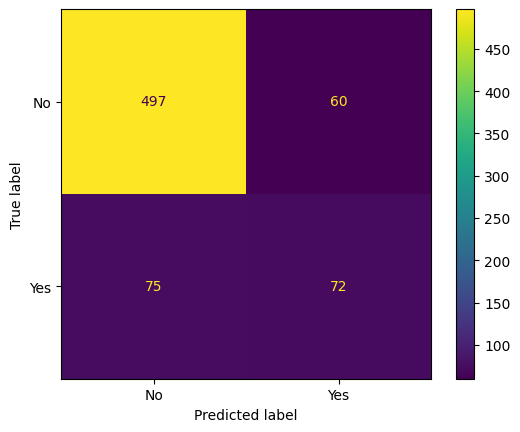

In [53]:
plotting_conf_matrix = ConfusionMatrixDisplay.from_estimator(grid_tree, X_test, y_test)

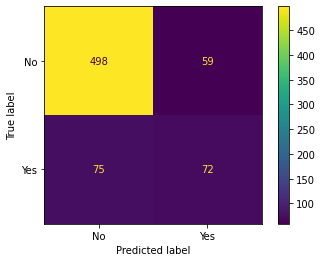

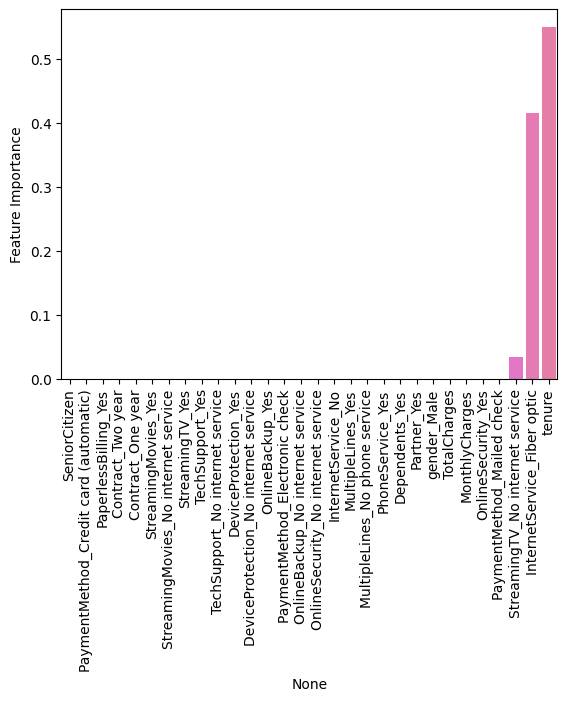

In [13]:
importances = pd.DataFrame(index=X.columns, data=grid_tree.best_estimator_.feature_importances_,
             columns=["Feature Importance"]).sort_values("Feature Importance")

sns.barplot(importances, x=importances.index, y='Feature Importance', hue=importances.index)
plt.xticks(rotation=90);

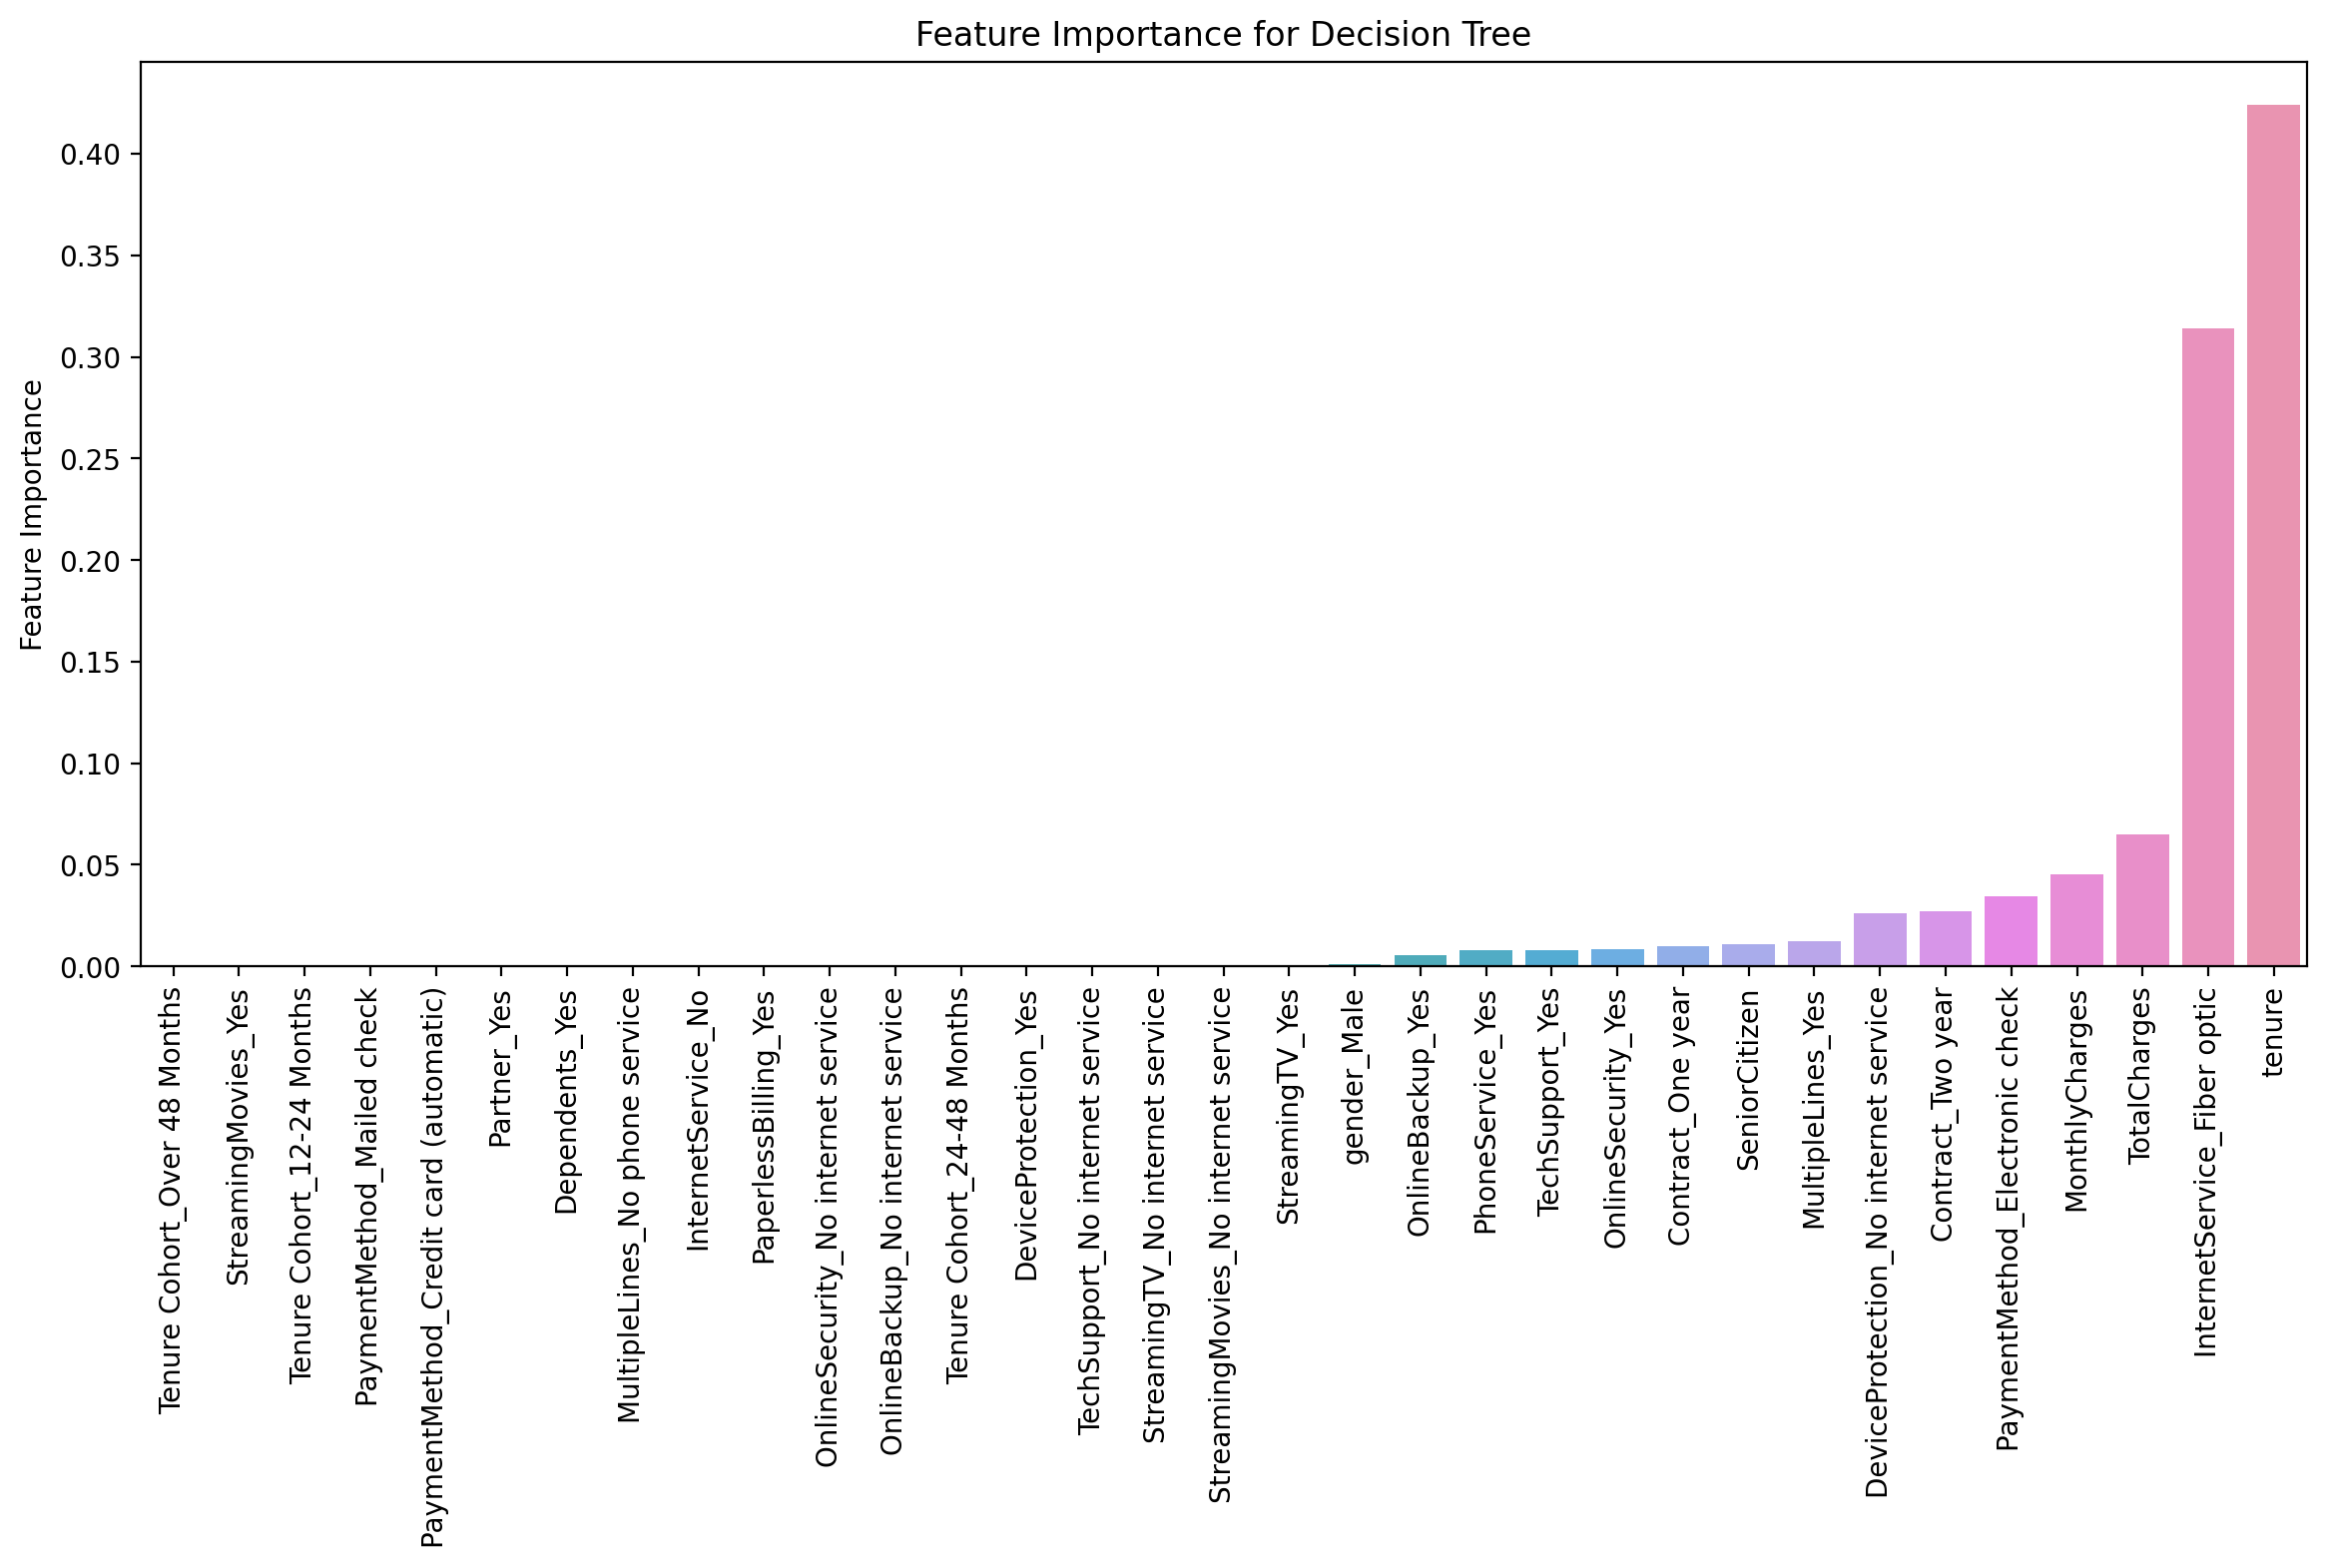

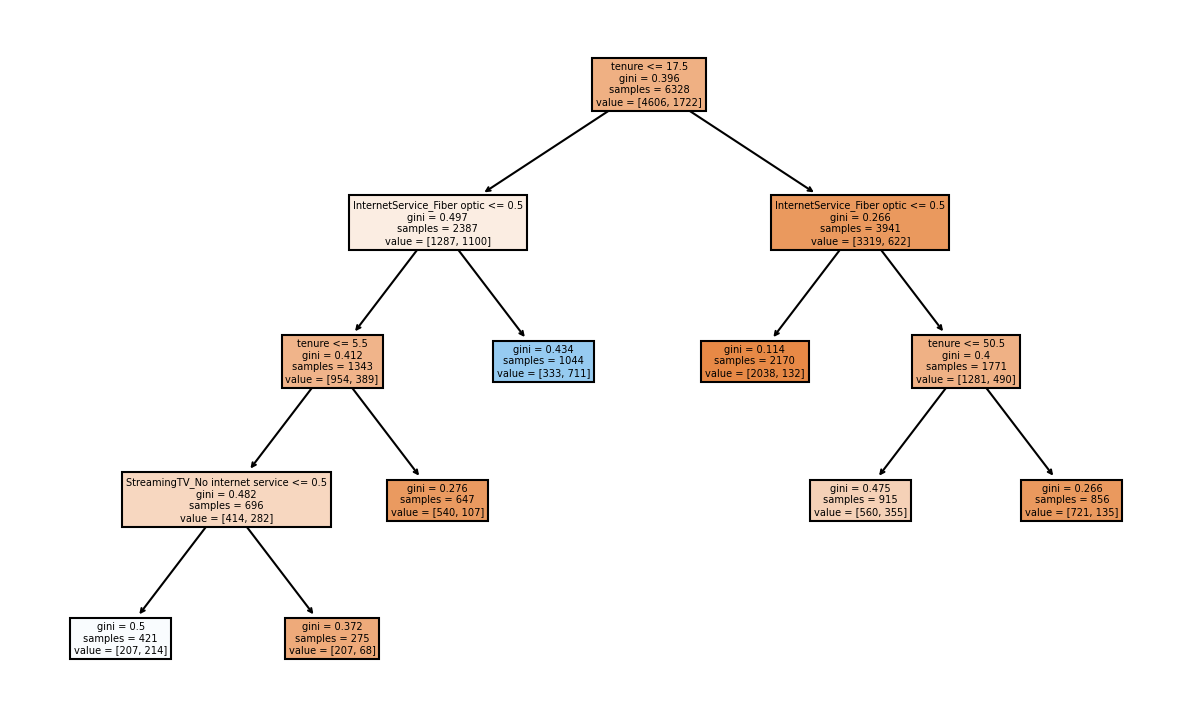

In [19]:
plt.figure(figsize=(10,6), dpi=150)
plot_tree(grid_tree.best_estimator_, feature_names=X.columns, filled=True);

<img src='hugetree.png'>

## Random Forest

**TASK 4 - 4: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid_forest = {'n_estimators':[64,100,128,200,250],
                     'criterion':['gini', 'entropy', 'log_loss'],
                     'min_impurity_decrease': np.linspace(0.0005,0.01,10),
                     'max_features':['sqrt','log2'],
                     'bootstrap':[True,False],
                     'oob_score':[True,False]}
model_rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(estimator=model_rfc, param_grid=param_grid_forest, 
                           cv=5, n_jobs=-1, scoring='accuracy')
rfc_grid.fit(X_train,y_train)

In [28]:
rfc_grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_impurity_decrease': 0.0005,
 'n_estimators': 128,
 'oob_score': False}

In [56]:
y_pred_rfc = rfc_grid.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

          No       0.87      0.93      0.90       557
         Yes       0.65      0.49      0.56       147

    accuracy                           0.84       704
   macro avg       0.76      0.71      0.73       704
weighted avg       0.83      0.84      0.83       704



              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.44      0.48       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



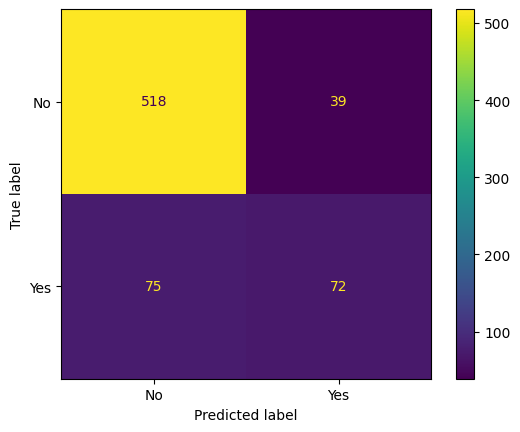

In [30]:
plot_conf_matrix = ConfusionMatrixDisplay.from_estimator(rfc_grid,X_test,y_test)

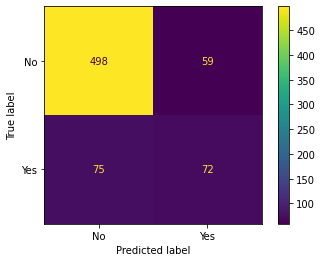

## Boosted Trees

**TASK 4-5: Use AdaBoost to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [44]:
from sklearn.ensemble import AdaBoostClassifier
param_grid_abc = {'n_estimators': np.arange(1,75),
                  'algorithm': ['SAMME', 'SAMME.R'],
                  'learning_rate': [0.1, 0.5, 1.0, 1.5],
                  'random_state': [101]}
model_abc = AdaBoostClassifier()
abc_grid = GridSearchCV(estimator=model_abc, param_grid=param_grid_abc, 
                           cv=5, n_jobs=-1, scoring='accuracy')
abc_grid.fit(X_train, y_train)

In [45]:
abc_grid.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 1.0,
 'n_estimators': 26,
 'random_state': 101}

In [48]:
y_pred_abc = abc_grid.predict(X_test)
print(classification_report(y_test, y_pred_abc))

              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.61      0.52      0.56       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.73       704
weighted avg       0.82      0.83      0.82       704



              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



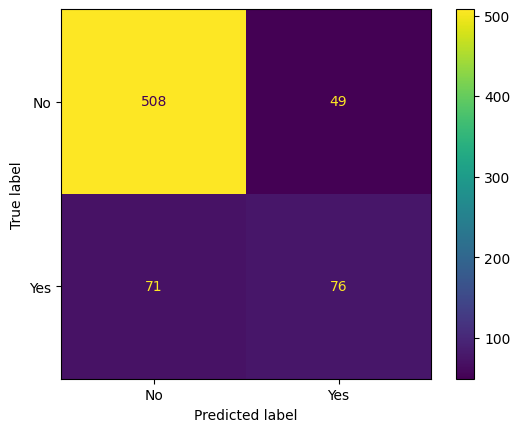

In [47]:
plot_conf_matrix = ConfusionMatrixDisplay.from_estimator(abc_grid,X_test,y_test)

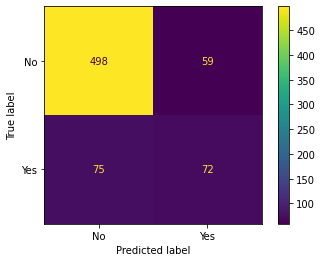

**TASK 4 - 6: Analyze your results, which model performed best for you?**

In [57]:
print(classification_report(y_test,y_pred_tree))
print(classification_report(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_abc))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704

              precision    recall  f1-score   support

          No       0.87      0.93      0.90       557
         Yes       0.65      0.49      0.56       147

    accuracy                           0.84       704
   macro avg       0.76      0.71      0.73       704
weighted avg       0.83      0.84      0.83       704

              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.61      0.52      0.56       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.73       704
weighted avg       0.82      0.83      0.82       704



In [ ]:
# Of these three, I'd choose the random forest classifier, since it has the highest accuracy as well
# as f1-score for Churn_Yes

### Great job!